# Sherical Hermonics: the angular solutions to Shrödinger's wave equation

Shödinger's equation in cartesian coordiantes ($x,y,z$)
$$
\nabla^2 \Psi + \frac{2M}{\hbar^2}\,[E - U(r)]\,\Psi = 0
$$

Transformed to shperical coordinates ($\rho,\theta,\phi$)
$$
\frac{1}{r^2}\frac{\partial}{\partial r}
\left(
r^2 \frac{\partial \Psi}{\partial r}
\right)
+
\frac{1}{r^2 \sin\theta}\frac{\partial}{\partial \theta}
\left(
\sin\theta \frac{\partial \Psi}{\partial \theta}
\right)
+
\frac{1}{r^2 \sin^2\theta}\frac{\partial^2 \Psi}{\partial \varphi^2}
+
\frac{2M}{\hbar^2}\,[E - U(r)]\,\Psi
=
0
$$

By separation of variables, we can rewrite the function as

$$
\Psi(r,\theta,\varphi) = R(r)\,Y(\theta,\varphi)
= R(r)\,\Theta(\theta)\,\Phi(\varphi),
$$

where $ Y(\theta,\varphi) $ corresponds to the spherical harmonics

We can now represent the solutions using three ODEs:

Angular in $\phi$
$$
\frac{d^2 \Phi}{d\varphi^2} + m^2 \Phi = 0
$$

Angular in $\theta$
$$
\frac{1}{\sin\theta}\frac{d}{d\theta}
\left(
\sin\theta \frac{d\Theta}{d\theta}
\right)
+
\left[
l(l+1) - \frac{m^2}{\sin^2\theta}
\right]\Theta
=
0
$$

And the radial component
$$
\frac{d}{dr}
\left(
r^2 \frac{dR}{dr}
\right)
+
\frac{2Mr^2}{\hbar^2}\,[E - U(r)]\,R
=
l(l+1)\,R
$$

where $ l(l+1) $ and $ m^2 $ are the separation constants

$$
l = 0, 1, 2, \ldots
$$

and

$$
m = 0, \pm 1, \pm 2, \ldots, \pm l.
$$




The spherical harmonics are a set of orthogonal solutions to the Laplace equation in the spherical domain using the Legendre polinomials $P_l^m$. They exist in the surface of a shpere with a constant radius, and are built as the solutions to the angular solutions of the angular components ($\theta, \phi$), giving rise to the following function:

$$
Y_l^m(\theta,\phi) = 
\varepsilon \sqrt{\frac{2l+1}{4\pi}\frac{(l-|m|!)}{(l+|m|)!}} P_l^m(cos\theta)exp(im\phi)
$$

where

$l = 0,1,2...$

$m = \pm l$

$\varepsilon = (-1)^m$ for $m>0$

$\varepsilon = 1$ for $m<0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lpmv, sph_harm

## Visualization of the L'Engendro polynomials

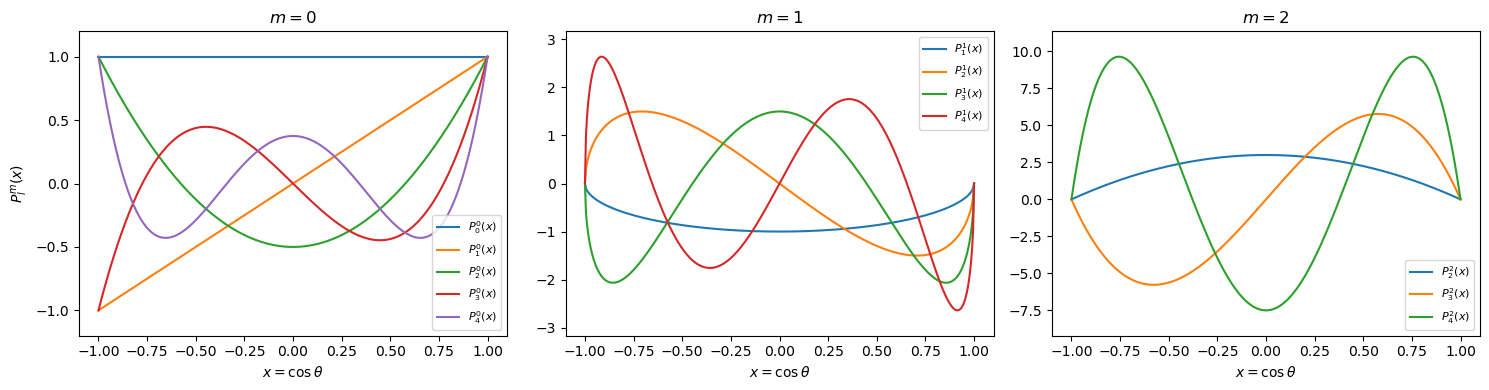

In [2]:
# Plotting the Lengendro polynomials
x = np.linspace(-1, 1, 400)
m_values = np.arange(0, 3)   
l_values = np.arange(0, 5)   

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, m in zip(axes, m_values):
    y_min, y_max = np.inf, -np.inf

    for l in l_values:
        if l >= m:
            P_lm = lpmv(m, l, x)
            ax.plot(x, P_lm, label=rf"$P_{{{l}}}^{{{m}}}(x)$")

            y_min = min(y_min, P_lm.min())
            y_max = max(y_max, P_lm.max())

    padding = 0.1 * (y_max - y_min)
    ax.set_ylim(y_min - padding, y_max + padding)

    ax.set_title(rf"$m = {m}$")
    ax.set_xlabel(r"$x = \cos\theta$")
    ax.legend(fontsize=8)

axes[0].set_ylabel(r"$P_l^m(x)$")

plt.tight_layout()
plt.show()


## Visualization of the spherical harmonics solutions

/var/folders/kx/4f309l4n2xx2j0b7mdsm86sm0000gn/T/ipykernel_63592/144790255.py:18: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y_lm = sph_harm(m, l, phi, theta)


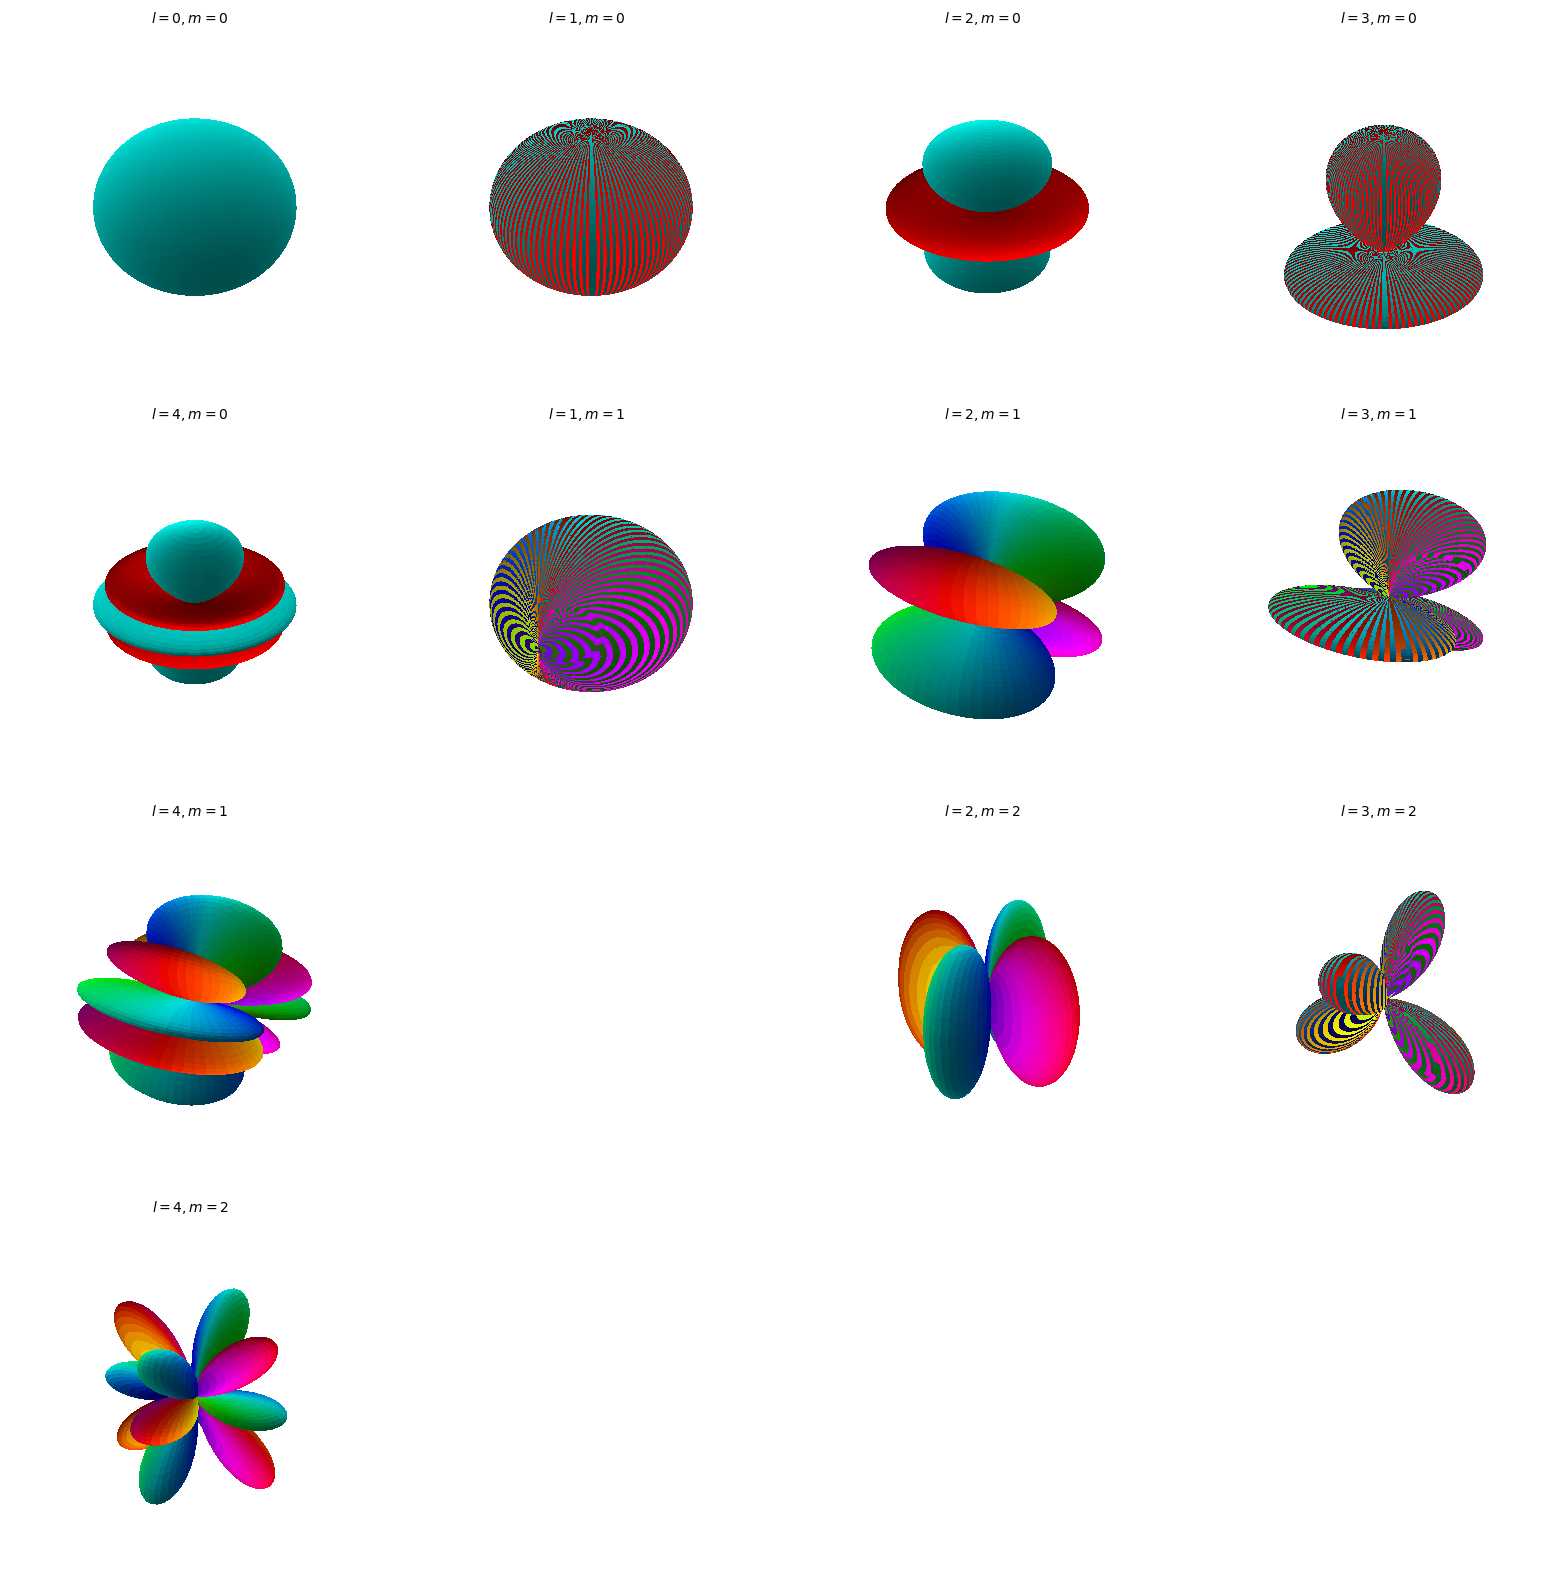

In [3]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Create subplot grid
fig = plt.figure(figsize=(16, 16))

for j, l in enumerate(l_values):
    for i, m in enumerate(m_values):
        ax_index = i * 4 + j + 1
        ax = fig.add_subplot(4, 4, ax_index, projection='3d')

        if l < m:
            ax.set_axis_off()
            continue

        # Spherical harmonic
        Y_lm = sph_harm(m, l, phi, theta)

        # Use the real part as radius for better m visualization
        r = Y_lm.real
        r = r / np.abs(r).max()  # normalize for consistent scale

        # Convert to Cartesian coordinates
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)

        # Optional: use phase as color
        phase = np.angle(Y_lm)
        colors = plt.cm.hsv((phase + np.pi) / (2 * np.pi))

        ax.plot_surface(
            x, y, z, facecolors=colors, rstride=1, cstride=1,
            linewidth=0, antialiased=False
        )

        ax.set_title(rf"$l={l}, m={m}$", fontsize=10)
        ax.set_axis_off()
        ax.view_init(30, 30)

plt.tight_layout()
plt.show()


/var/folders/kx/4f309l4n2xx2j0b7mdsm86sm0000gn/T/ipykernel_63592/3370010432.py:13: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y_max = max(Y_max, np.abs(sph_harm(m, l, phi, theta).real).max())
/var/folders/kx/4f309l4n2xx2j0b7mdsm86sm0000gn/T/ipykernel_63592/3370010432.py:25: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y_lm_real = sph_harm(m, l, phi, theta).real


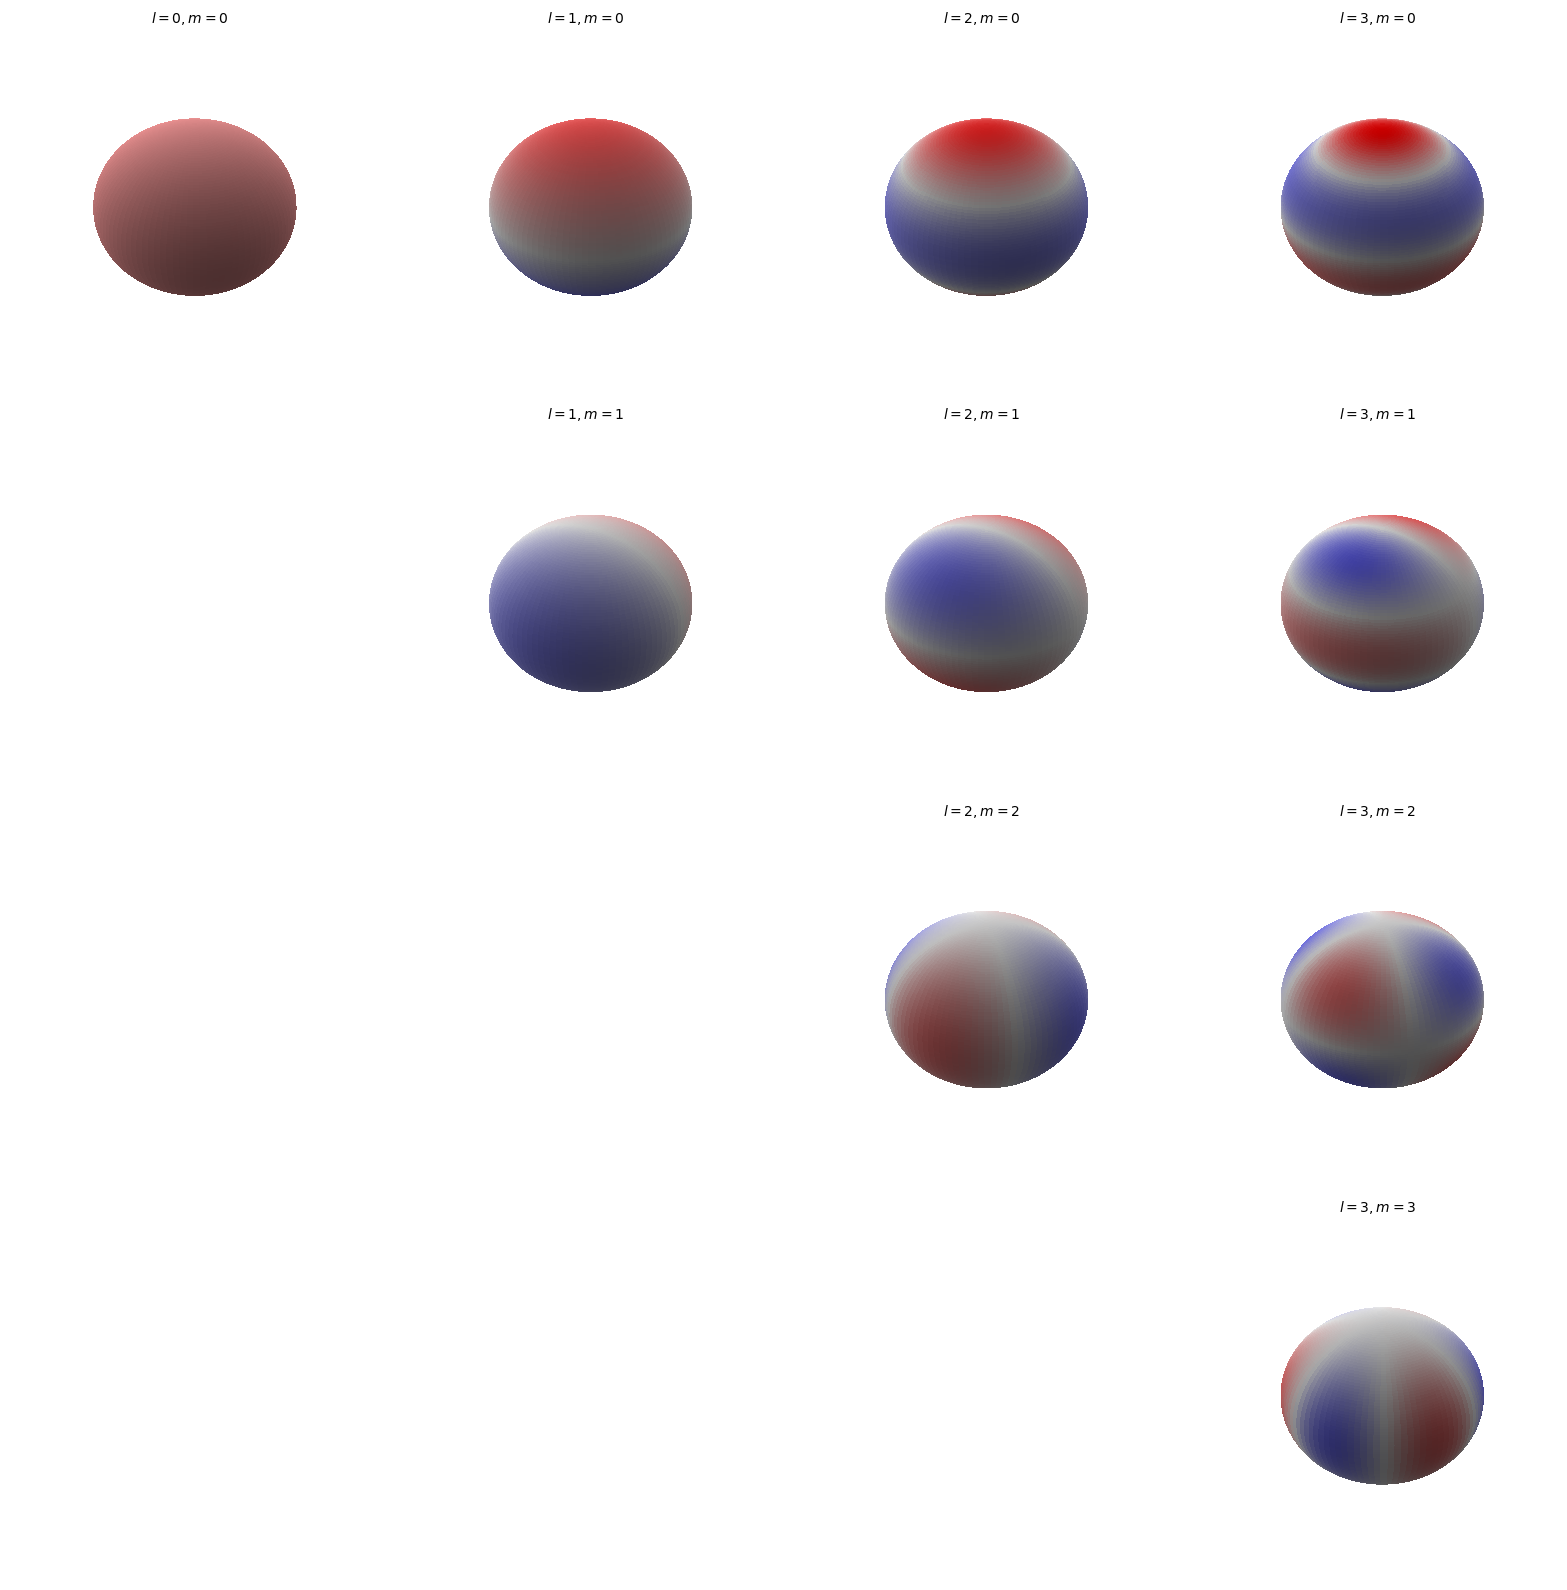

In [6]:
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Create 4x4 subplot grid
fig = plt.figure(figsize=(16, 16))

# Compute max absolute real value across all Y_lm for consistent color scale
Y_max = 0
for m in m_values:
    for l in l_values:
        if l >= m:
            Y_max = max(Y_max, np.abs(sph_harm(m, l, phi, theta).real).max())

for j, l in enumerate(l_values):
    for i, m in enumerate(m_values):
        ax_index = i * 4 + j + 1
        ax = fig.add_subplot(4, 4, ax_index, projection='3d')

        if l < m:
            ax.set_axis_off()
            continue

        # Spherical harmonic (real part)
        Y_lm_real = sph_harm(m, l, phi, theta).real

        # Normalize color from -Y_max to +Y_max for red-white-blue mapping
        colors = plt.cm.bwr((Y_lm_real + Y_max) / (2 * Y_max))

        # Plot surface on unit sphere
        ax.plot_surface(
            x, y, z, facecolors=colors, rstride=1, cstride=1,
            linewidth=0, antialiased=False
        )

        ax.set_title(rf"$l={l}, m={m}$", fontsize=10)
        ax.set_axis_off()
        ax.view_init(30, 30)

plt.tight_layout()
plt.show()


## Plot any function in the unit sphere

In [ ]:
def plot_on_unit_sphere_cartesian(func, points=100, cmap='bwr', normalize=True, title=None):

    theta = np.linspace(0, np.pi, points)
    phi = np.linspace(0, 2 * np.pi, points)
    theta, phi = np.meshgrid(theta, phi)

    # Coordinates transformation to cartesian
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # f(x) evaluation on the sphere
    F = func(x, y, z)
    if np.iscomplexobj(F):
        F = F.real 

    # Normalize
    if normalize:
        F_max = np.max(np.abs(F))
        colors = plt.cm.get_cmap(cmap)((F + F_max) / (2 * F_max))
    else:
        colors = plt.cm.get_cmap(cmap)(F)

    # Plot
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(
        x, y, z, facecolors=colors, rstride=1, cstride=1,
        linewidth=0, antialiased=False
    )

    ax.set_axis_off()
    if title:
        ax.set_title(title, fontsize=12)
    ax.view_init(30, 30)
    plt.show()


/var/folders/kx/4f309l4n2xx2j0b7mdsm86sm0000gn/T/ipykernel_63592/1132186826.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)((F + F_max) / (2 * F_max))


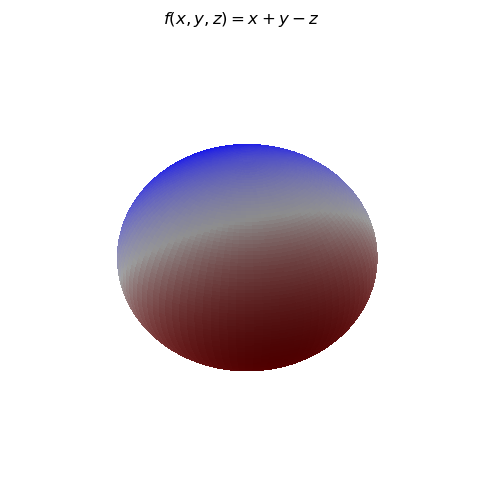

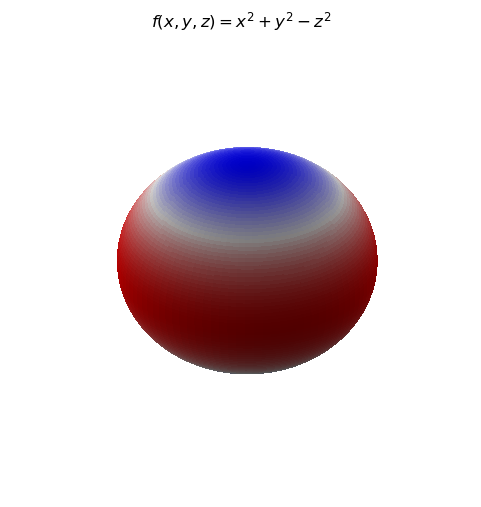

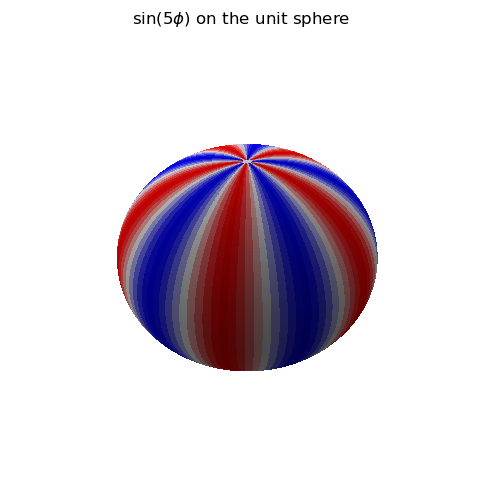

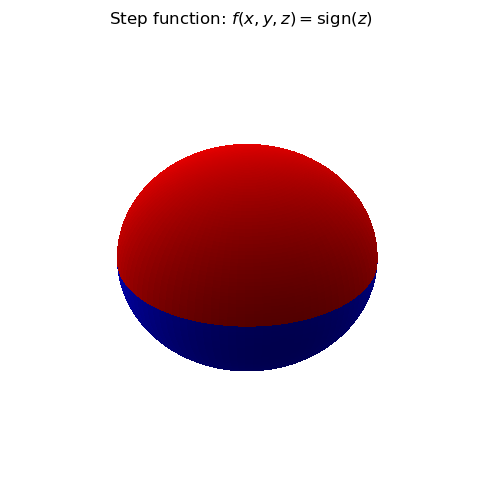

In [12]:
plot_on_unit_sphere_cartesian(
    func=lambda x, y, z: x + y - z,  # your straight line/plane function
    cmap='bwr',
    title=r"$f(x, y, z) = x + y - z$"
)

plot_on_unit_sphere_cartesian(
    func=lambda x, y, z: x**2 + y**2 - z**2,  # your quadratic function
    cmap='bwr',
    title=r"$f(x, y, z) = x^2 + y^2 - z^2$"
)   

plot_on_unit_sphere_cartesian(
    func=lambda x, y, z: np.sin(5 * np.arctan2(y, x)),  # 5 full sine waves around φ
    cmap='bwr',
    title=r"$\sin(5\phi)$ on the unit sphere"
)

plot_on_unit_sphere_cartesian(
    func=lambda x, y, z: np.where(z > 0, 1, -1),  # step at z = 0
    cmap='bwr',
    title=r"Step function: $f(x,y,z)=\mathrm{sign}(z)$"
)




## Tennis ball drawing

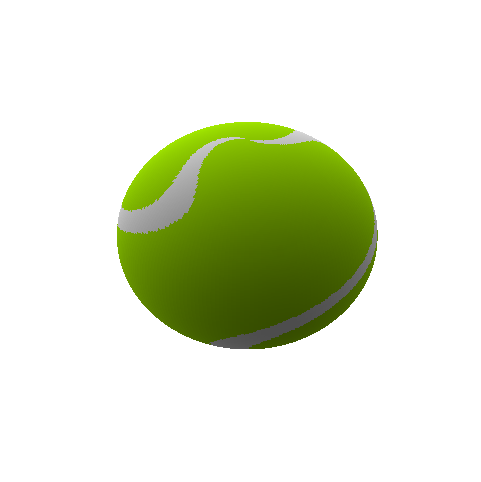

In [ ]:
def tennis_ball_pattern(x, y, z):
    theta = np.arccos(z)        
    phi = np.arctan2(y, x)      
    phi = (phi + 2*np.pi) % (2*np.pi)  

    seam_width = 0.2           
    amplitude = np.pi / 2.5    

    # Two curved figure-8 seams
    seam1 = np.abs(phi - (np.pi/2 + amplitude * np.sin(2*theta))) < seam_width
    seam2 = np.abs(phi - (3*np.pi/2 + amplitude * np.sin(2*theta))) < seam_width

    pattern = np.where(seam1 | seam2, 1, 0)
    return pattern

def plot_tennis_ball(points=200):
    theta = np.linspace(0, np.pi, points)
    phi = np.linspace(0, 2*np.pi, points)
    theta, phi = np.meshgrid(theta, phi)

    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    pattern = tennis_ball_pattern(x, y, z)

    colors = np.zeros(x.shape + (3,))
    colors[..., :] = [0.7, 1, 0]            
    colors[pattern == 1, :] = [1, 1, 1]   

    # Plot
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(
        x, y, z, facecolors=colors, rstride=1, cstride=1,
        linewidth=0, antialiased=False
    )
    ax.set_axis_off()
    ax.view_init(30, 30)
    plt.show()

plot_tennis_ball()
